# Prosper Loan Data Exploration
## by: Abed Ibrahim Sultan

## Preliminary Wrangling

This document explores a dataset containing 113,937 loans with 81 variables on each loan. This [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) explains the variables in the data set. Only 12 attributes were selected to do the analysis on.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
original_df = pd.read_csv('prosperLoanData.csv')

In [3]:
# Extract the required attributes to be analyzed into a new dataframe
df = original_df[['Term','LoanStatus','BorrowerRate','IncomeRange','IncomeVerifiable','StatedMonthlyIncome',
         'TotalProsperLoans','LoanCurrentDaysDelinquent','LoanOriginalAmount','LoanOriginationQuarter',
         'MonthlyLoanPayment','Investors']]

In [4]:
# View the first 5 rows
df.head()

,Term,LoanStatus,BorrowerRate,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,TotalProsperLoans,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationQuarter,MonthlyLoanPayment,Investors
0,36,Completed,0.1580,"$25,000-49,999",True,3083.333333,NaN,0,9425,Q3 2007,330.43,258
1,36,Current,0.0920,"$50,000-74,999",True,6125.000000,NaN,0,10000,Q1 2014,318.93,1
2,36,Completed,0.2750,Not displayed,True,2083.333333,NaN,0,3001,Q1 2007,123.32,41
3,36,Current,0.0974,"$25,000-49,999",True,2875.000000,NaN,0,10000,Q4 2012,321.45,158
4,36,Current,0.2085,"$100,000+",True,9583.333333,1.0,0,15000,Q3 2013,563.97,20


In [5]:
# overview of data shape and types
print(df.shape)
print(df.dtypes)

(113937, 12)
Term                           int64
LoanStatus                    object
BorrowerRate                 float64
IncomeRange                   object
IncomeVerifiable                bool
StatedMonthlyIncome          float64
TotalProsperLoans            float64
LoanCurrentDaysDelinquent      int64
LoanOriginalAmount             int64
LoanOriginationQuarter        object
MonthlyLoanPayment           float64
Investors                      int64
dtype: object


In [6]:
# Check for null values
df.isnull().sum()

Term                             0
LoanStatus                       0
BorrowerRate                     0
IncomeRange                      0
IncomeVerifiable                 0
StatedMonthlyIncome              0
TotalProsperLoans            91852
LoanCurrentDaysDelinquent        0
LoanOriginalAmount               0
LoanOriginationQuarter           0
MonthlyLoanPayment               0
Investors                        0
dtype: int64

In [7]:
# Convert null values to 0 and check
df = df.fillna(0)
df.isnull().sum()

Term                         0
LoanStatus                   0
BorrowerRate                 0
IncomeRange                  0
IncomeVerifiable             0
StatedMonthlyIncome          0
TotalProsperLoans            0
LoanCurrentDaysDelinquent    0
LoanOriginalAmount           0
LoanOriginationQuarter       0
MonthlyLoanPayment           0
Investors                    0
dtype: int64

In [8]:
# convert IncomeRange, LoanOriginationQuarter, and LoanStatus into ordered categorical types
ordinal_vars={'IncomeRange':['Not displayed','Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+'],
             'LoanOriginationQuarter':['Q4 2005','Q1 2006','Q2 2006','Q3 2006','Q4 2006','Q1 2007','Q2 2007','Q3 2007','Q4 2007','Q1 2008','Q2 2008','Q3 2008','Q4 2008','Q2 2009','Q3 2009','Q4 2009','Q1 2010','Q2 2010','Q3 2010','Q4 2010','Q1 2011','Q2 2011','Q3 2011','Q4 2011','Q1 2012','Q2 2012','Q3 2012','Q4 2012','Q1 2013','Q2 2013','Q3 2013','Q4 2013','Q1 2014'],
             'LoanStatus':['Current','FinalPaymentInProgress','Completed','Past Due (1-15 days)','Past Due (16-30 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (91-120 days)','Past Due (>120 days)','Chargedoff','Defaulted','Cancelled']}

for var in ordinal_vars:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_vars[var])
    df[var] = df[var].astype(ordered_var)

### What is the structure of your dataset?

> There are 113937 loans in the dataset with 12 attributes. The numeric variables are (BorrowerRate, StatedMonthlyIncome, LoanCurrentDaysDelinquent, LoanOriginalAmount, MonthlyLoanPayment, Investors). While the categorical variables are (Term, LoanStatues, IncomeRange, IncomeVerifiable, TotalProsperLoans, LoanOriginationQuarter).

### What is/are the main feature(s) of interest in your dataset?

> There is no one specific feature of intersest in the dataset. Instead, I investigated different features with no major one, and I answered some questions which are: <br/> 
1- What is the distribution of each attribute? <br/>
2- What is the relation between the borrower rate and the loan original amount? <br/>
3- How are the stated monthly income and the loan current days delinquent attributes related? <br/>
4- What is the distribution of each loan status in each income range? <br/>
5- What is the relation between the borrower rate and the term? <br/>
6- What is the relation between the income range and the monthly loan payment? <br/>
7- What is the relation between the loan original amount, stated monthly income and borrower rate? <br/>
8- What is the relation between the borrower rate, monthly loan payment, and Term? <br/>
But, We can assume that the most interesting features are borrower rate.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> For each of the questions above, the features are addressed with no major one. So, every feature helps in investigating the other features in each question. It is obvious that the most frequent used feature is the borrower rate.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

Here, the first question is answered which is "What is the distribution of each attribute?".

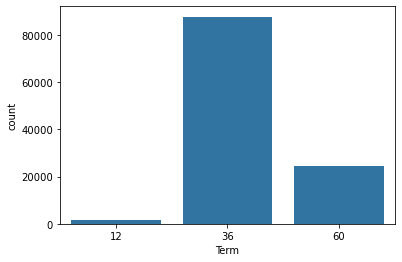

In [9]:
# plot the distribution of term
default_color = sb.color_palette()[0]
sb.countplot(data=df, x='Term', color=default_color);

The most frequent term is 36 with more than 80000 entries. Then, the term 60 has between 20000 and 30000 entries, While, the least term is 12 with fewer than 10000 entries.

Next, plot the distribution of Loan Status.

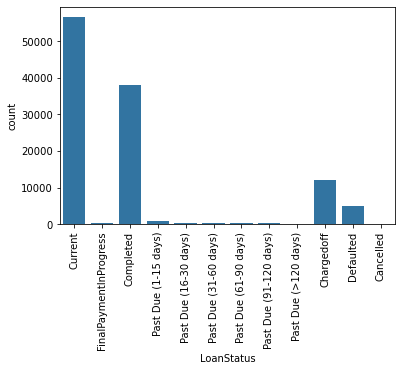

In [10]:
# plot the distribution of Loan Status
sb.countplot(data=df, x='LoanStatus', color=default_color)
plt.xticks(rotation=90);

The loans with current status is the most frequent with more than 50000 entries. The completed status has slightly fewer than 40000 entries. The charged off status has slightly more than 10000 entries, While, each of the other status has fewer than 10000 entries.

Next, plot the distribution of Borrower Rate.

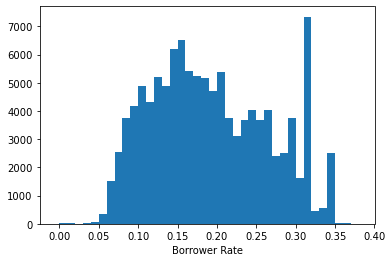

In [11]:
# plot the distribution of Borrower Rate
bin_size = 0.01
bins = np.arange(0,df['BorrowerRate'].max()+bin_size,bin_size)
plt.hist(data=df, x='BorrowerRate', bins=bins);
plt.xlabel('Borrower Rate')
plt.xlim(right=.4);

The distribution of the borrower rate is about to be normally distributed with some jumps in the data frequencies. The figure was limited to values less than 0.4 to show maore details beause most of the data is in this range and there are some outliers higher than 0.4.

Next, plot the distribution of Income Range.

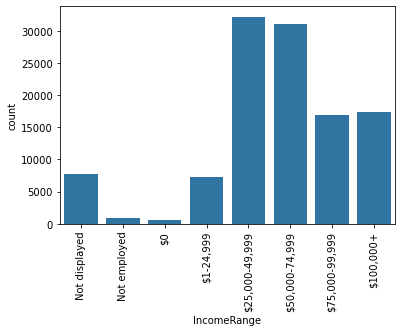

In [12]:
# plot the distribution of Income Range
sb.countplot(data=df, x='IncomeRange', color=default_color)
plt.xticks(rotation=90);

For people who displayed their income, the categories of (25000 - 49999) and (50000 - 74999) are nearly equal with slightly more than 30000 entries. More than those, categories with fewer than 100000 and more than 100000 are nearly equal with about 15000 entries. About 7000 person have income fewer than 25000. Each of the not employed and the 0 income categories has about 1000 entries. The not displayed category has about 8000 entries.

Next, plot the distribution of Income Verifiable.

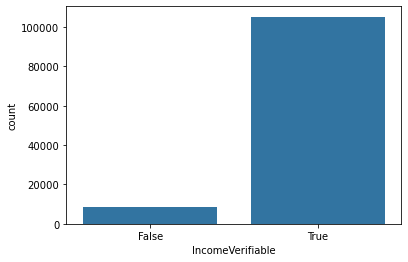

In [13]:
# plot the distribution of Income Verifiable
sb.countplot(data=df, x='IncomeVerifiable', color=default_color);

Most of the people verified income. They are more than 100000 one. The others didn't.

Next, plot the distribution of the Stated Monthly Income.

In [14]:
# Statistics of the Stated Monthly Income
df['StatedMonthlyIncome'].describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

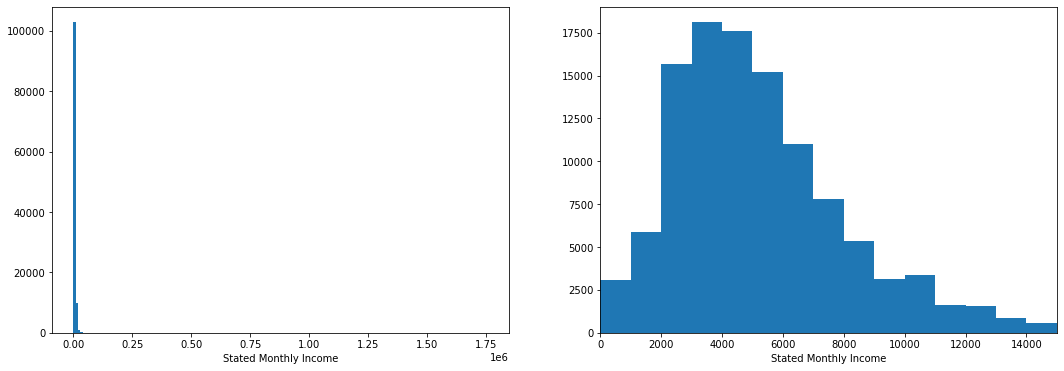

In [15]:
# plot the distribution of Stated Monthly Income
plt.figure(figsize = [18, 6])

plt.subplot(1,2,1)
bin_size = 10000
bins = np.arange(0,df['StatedMonthlyIncome'].max()+bin_size,bin_size)
plt.hist(data=df, x='StatedMonthlyIncome', bins=bins);
plt.xlabel('Stated Monthly Income');


plt.subplot(1,2,2)
bin_size = 1000
bins = np.arange(0,df['StatedMonthlyIncome'].max()+bin_size,bin_size)
plt.hist(data=df, x='StatedMonthlyIncome', bins=bins);
plt.xlabel('Stated Monthly Income');
plt.xlim((0,15000));

The graph on the left shows the data without removing outliers. After focusing on data fewer than 15000, the figure displays that the data is right-skewed.

Next, plot the distribution of Total Prosper Loans.

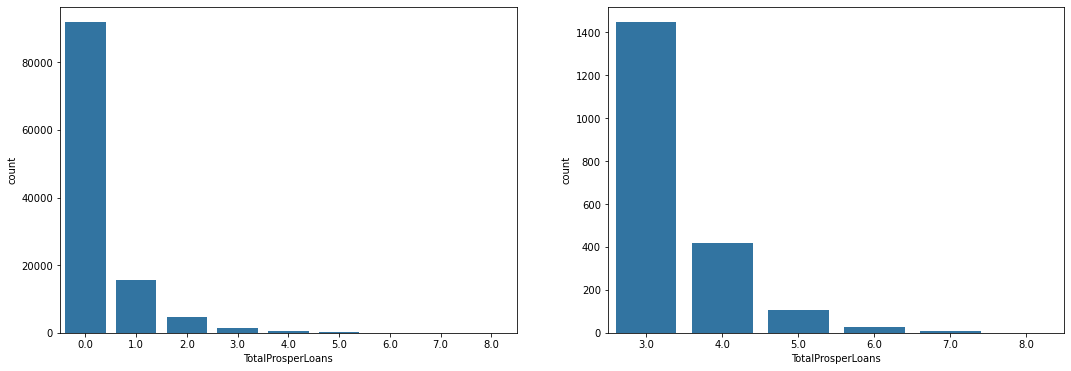

In [16]:
# plot the distribution of Total Prosper Loans
plt.figure(figsize = [18, 6])

plt.subplot(1,2,1)
sb.countplot(data=df, x='TotalProsperLoans', color=default_color);

plt.subplot(1,2,2)
focus_df = df[df['TotalProsperLoans']>=3]
sb.countplot(data=focus_df, x='TotalProsperLoans', color=default_color);

The whole data are displayed on the left. The most frequent total prosper loans is 0 with about 90000 entries. People with 1 prosper loan have slightly fewer than 20000 entries, and People with 2 prosper loan have about 5000 entries. The other values are focused on the graph on the right. Except of the 3 which has about 1400 entries, each of them has less than 500 entries.

Next, plot the distribution of the loan current days delinquent.

In [17]:
# Statistics for the loan current days delinquent
df['LoanCurrentDaysDelinquent'].describe()

count    113937.000000
mean        152.816539
std         466.320254
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        2704.000000
Name: LoanCurrentDaysDelinquent, dtype: float64

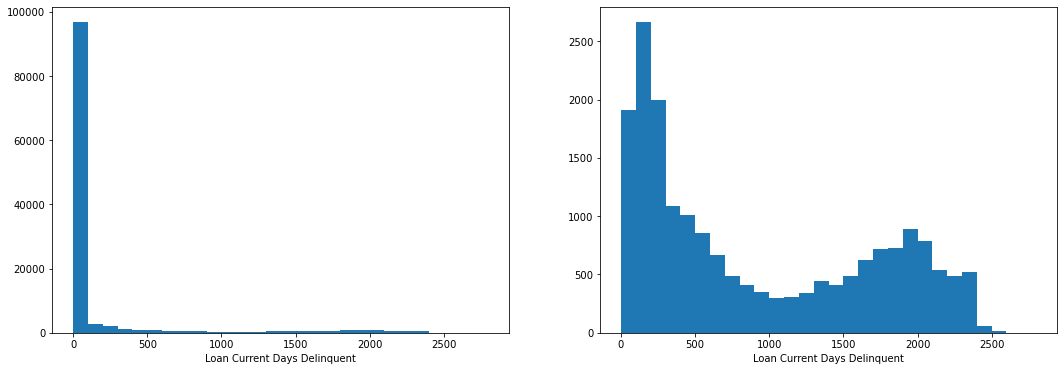

In [18]:
# plot the distribution of Borrower Rate
plt.figure(figsize = [18, 6])

plt.subplot(1,2,1)
bin_size = 100
bins = np.arange(0,df['LoanCurrentDaysDelinquent'].max()+bin_size,bin_size)
plt.hist(data=df, x='LoanCurrentDaysDelinquent', bins=bins);
plt.xlabel('Loan Current Days Delinquent');

plt.subplot(1,2,2)
focused_df = df[df['LoanCurrentDaysDelinquent']>0]
plt.hist(data=focused_df, x='LoanCurrentDaysDelinquent', bins=bins);
plt.xlabel('Loan Current Days Delinquent');

We see from the statistics and the graph on the left that most of the data are 0 days delinquent. On the right, the graph shows the non-zero days delinquent data distribution. The frequency decreases until reaching about 1000 and then increases.

Next, plot the distribution of Loan Original Amount.

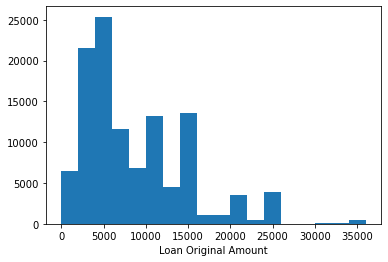

In [19]:
# plot the distribution of Loan Original Amount
bin_size = 2000
bins = np.arange(0,df['LoanOriginalAmount'].max()+bin_size,bin_size)
plt.hist(data=df, x='LoanOriginalAmount', bins=bins);
plt.xlabel('Loan Original Amount');

This distribution is right skewed with some jumps in the distributions.

Next, plot the distribution of Loan Origination Quarter.

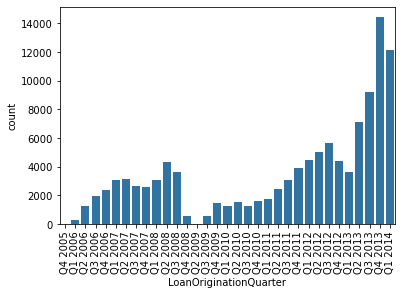

In [20]:
# plot the distribution of Loan Origination Quarter
sb.countplot(data=df, x='LoanOriginationQuarter', color=default_color)
plt.xticks(rotation=90);

Generally, the number of entries increases with time. But, at the end of 2008 and the start of 2009, the frequencies dropped to about 0. After that, the frequency increases geadually with slightly decreasing grom Q3 2012 to Q1 2013.

Next, plot the distribution of monthly loan payment.

In [21]:
# Statistics of the monthly loan payment
df['MonthlyLoanPayment'].describe()

count    113937.000000
mean        272.475783
std         192.697812
min           0.000000
25%         131.620000
50%         217.740000
75%         371.580000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

C:\Users\Mona\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


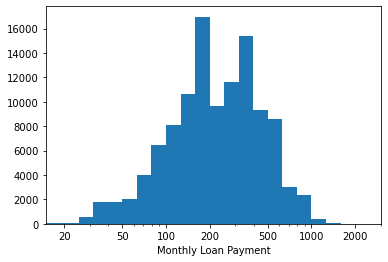

In [22]:
# plot the log distribution of Monthly Loan Payment
log_binsize = .1
bins = 10**np.arange(1,np.log10(df['MonthlyLoanPayment']).max()+log_binsize,log_binsize)
plt.hist(data=df, x='MonthlyLoanPayment', bins=bins)
plt.xscale('log')
xticks = [10,20,50,100,200,500,1000,2000]
plt.xticks(xticks,xticks)

plt.xlabel('Monthly Loan Payment');
plt.xlim((15,3000));

The log distribution of the monthly loan payment is about to be normally distriibuted except for the decreasing from about 200 to 400.

Next, plot the distribution of Investors.

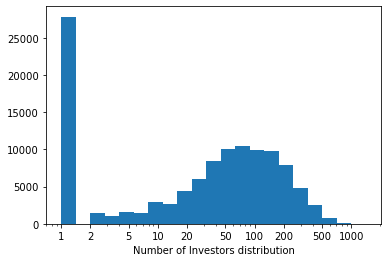

In [23]:
# plot the distribution of Investors
log_binsize = .15
bins = 10**np.arange(0,np.log10(df['Investors']).max()+log_binsize,log_binsize)
plt.hist(data=df, x='Investors', bins=bins)
plt.xscale('log');
xticks = [1,2,5,10,20,50,100,200,500,1000]
plt.xticks(xticks,xticks)
plt.xlabel('Number of Investors distribution');

The most frequent number of investors is one. The log distribution of non-one number of investors is about to be normally distributed with slightly low left skewness.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> -The distribution of the borrower rate is about to be normally distributed with some jumps in the data frequencies. There are some outliers higher than 0.4, so, the graph x axis is limited to 0.4 to be shown as like as the outliers were removed. 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> -Most of the data in the lian current days delinquent are zero, so, another plot is displayed to show the non-zero values. <br/> -The stated monthly income has far outliers bigger than 15000, so, the graph x axis is limited to 15000 to be shown as like as the outliers were removed. <br/>
-The monthly loan payment has a long tail on the right, so, the log distribution is displayed instead. The log distribution of the monthly loan payment is about to be normally distriibuted except for the decreasing from about 200 to 400.

## Bivariate Exploration

Start by showing the pairwise correlations present between numeric variables in the data.

In [24]:
numeric_vars = ['BorrowerRate', 'StatedMonthlyIncome', 'LoanCurrentDaysDelinquent','LoanOriginalAmount', 'MonthlyLoanPayment',
                'Investors']
categoric_vars = ['Term', 'LoanStatues', 'IncomeRange', 'IncomeVerifiable', 'TotalProsperLoans', 'LoanOriginationQuarter']

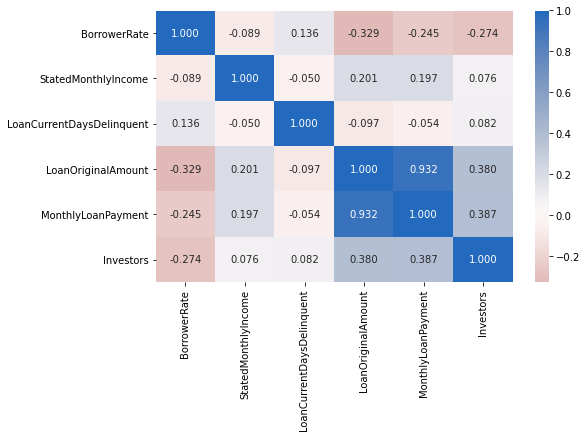

In [25]:
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

Plot a quick overview of the relation between every two combinations of the numeric data.

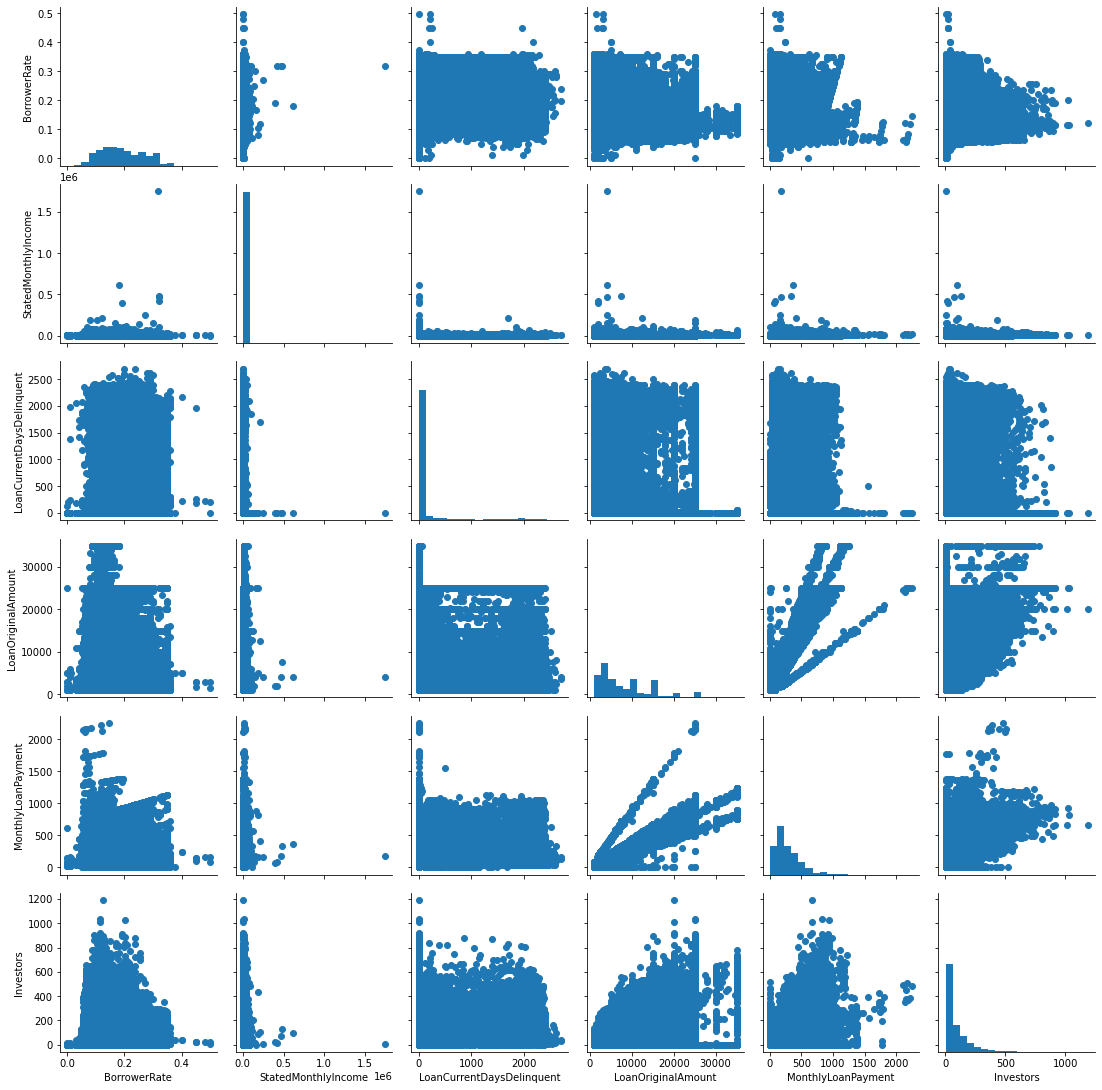

In [26]:
g = sb.PairGrid(data = df, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

It is hard to get insights from the general view, so, the following steps are done.

Next, Answer the second question: What is the relation between the borrower rate and the loan original amount? <br/>
A heatmap is displayed beside the scatter plot in order to show more details.

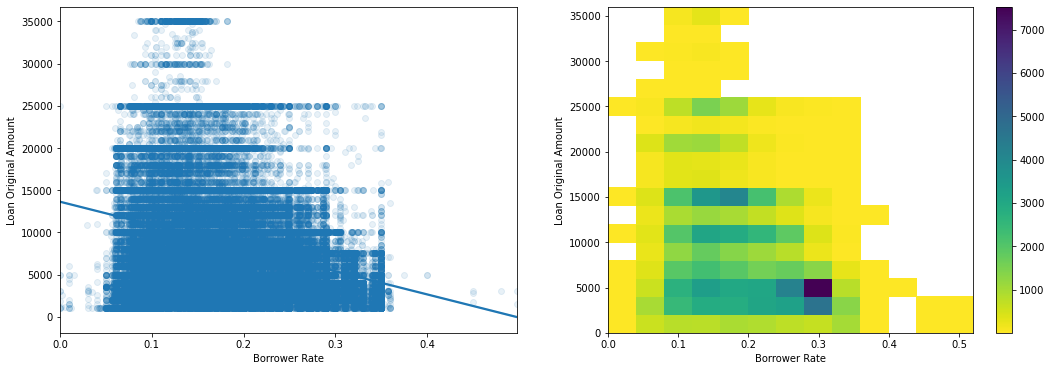

In [27]:
plt.figure(figsize = [18, 6])

#Plot On Left
plt.subplot(1, 2, 1)
sb.regplot(data=df, y='LoanOriginalAmount', x='BorrowerRate', scatter_kws={'alpha':1/10});
plt.ylabel('Loan Original Amount')
plt.xlabel('Borrower Rate')

#Plot On Right
plt.subplot(1, 2, 2)
bins_x = np.arange(0,df['BorrowerRate'].max()+.04,.04)
bins_y = np.arange(0,df['LoanOriginalAmount'].max()+2000,2000)
plt.hist2d(data = df, y = 'LoanOriginalAmount', x = 'BorrowerRate', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.ylabel('Loan Original Amount')
plt.xlabel('Borrower Rate');

The most frequent data are those around 0.3 borrower rate and 5000 Loan original amount. The correlation coefficient is -0.329

Next, Answer the question: How are the stated monthly income and the loan current days delinquent attributes related? <br/>
A heatmap is displayed beside the scatter plot in order to show more details.

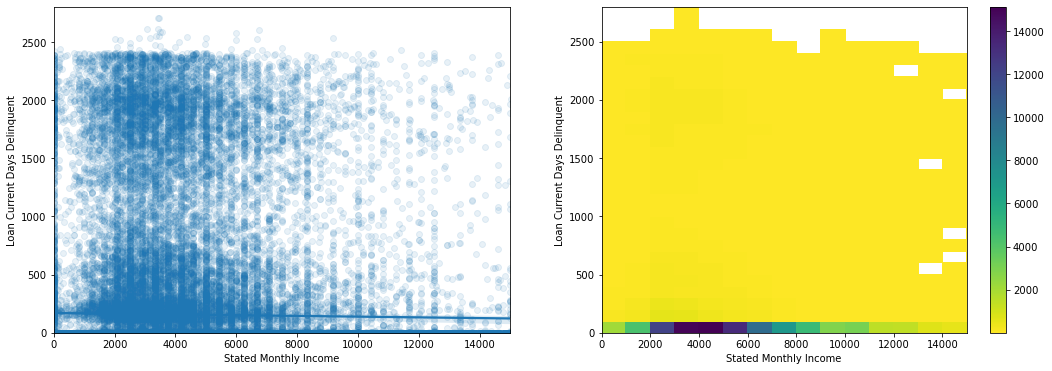

In [43]:
plt.figure(figsize = [18, 6])

#Plot On Left
plt.subplot(1, 2, 1)
sb.regplot(data=df, x='StatedMonthlyIncome', y='LoanCurrentDaysDelinquent', scatter_kws={'alpha':1/10});
plt.xlabel('Stated Monthly Income')
plt.ylabel('Loan Current Days Delinquent')
plt.xlim((0,15000))
plt.ylim((0,df['LoanCurrentDaysDelinquent'].max()+100))

#Plot On Right
plt.subplot(1, 2, 2)
bins_x = np.arange(0,df['StatedMonthlyIncome'].max()+1000,1000)
bins_y = np.arange(0,df['LoanCurrentDaysDelinquent'].max()+100,100)
plt.hist2d(data = df, x = 'StatedMonthlyIncome', y = 'LoanCurrentDaysDelinquent', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Stated Monthly Income')
plt.ylabel('Loan Current Days Delinquent')
plt.xlim((0,15000));

It is obvious that there is no relationship between the two variables. The higher density is around from 3000 to 5000 monthly income with fewer than 100 days delinquent.

Next, Answer the question: What is the distribution of each loan status in each income range? <br/>
A  clustered bar chart is used in the first cell, then A heatmap is used in the second cell to show more details.

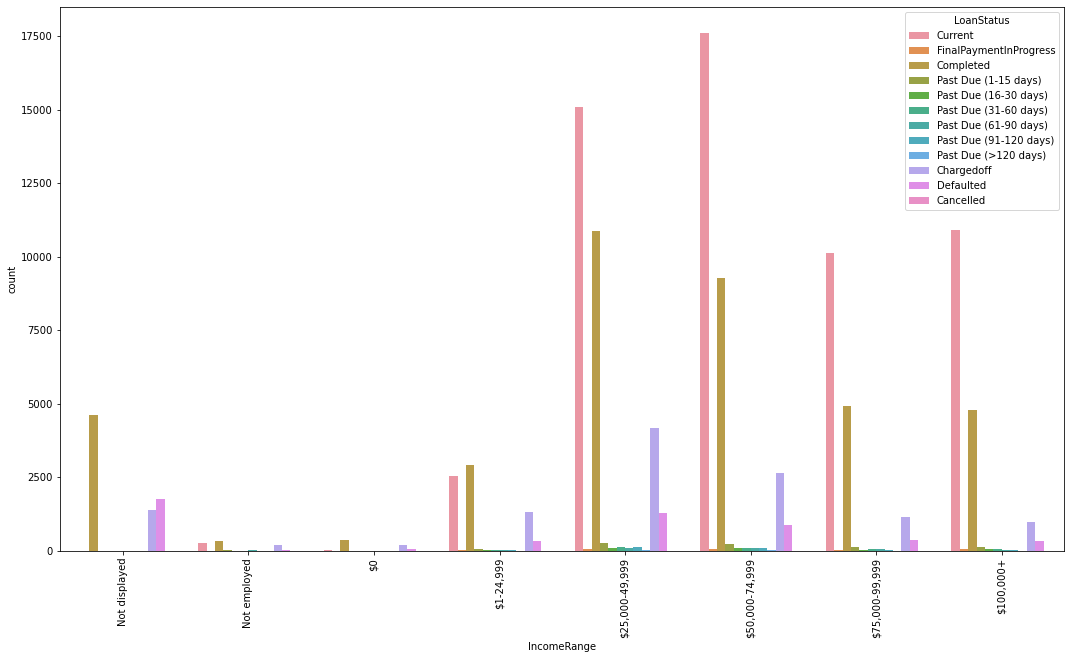

In [30]:
# display a clustered bar chart
plt.figure(figsize=[18,10])
sb.countplot(data=df, x='IncomeRange', hue='LoanStatus')
plt.xticks(rotation=90);

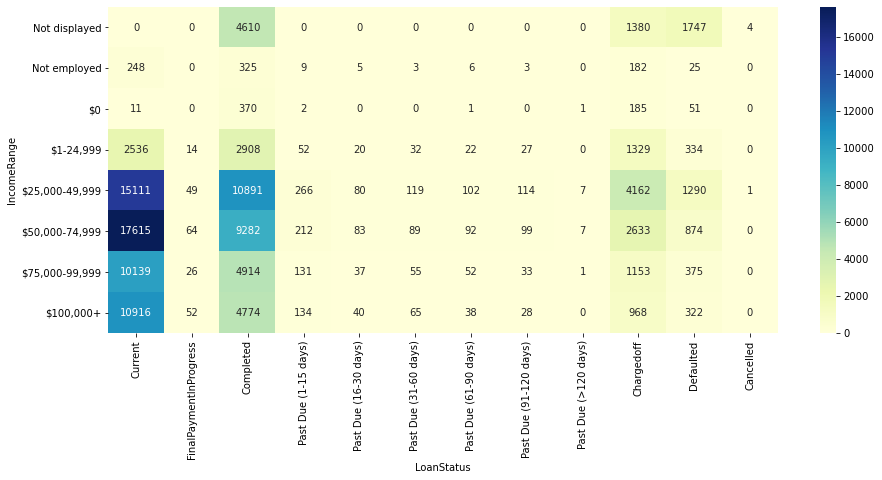

In [31]:
# display a heat map
counts = df.groupby(['IncomeRange', 'LoanStatus']).size()
counts = counts.reset_index(name='count')
counts = counts.pivot(index = 'IncomeRange', columns = 'LoanStatus', values = 'count')
plt.figure(figsize=[15,6])
sb.heatmap(counts, cmap="YlGnBu", annot = True, fmt = 'd');

Data is highly concentrated in the current status and completed status with ranges higher than 0. The most frequent data is in the intersection between current status and 50000 - 74999 income range.

Next, Answer the question: What is the relation between the borrower rate and the term? <br/>
A  violin plot and a box plot are used.

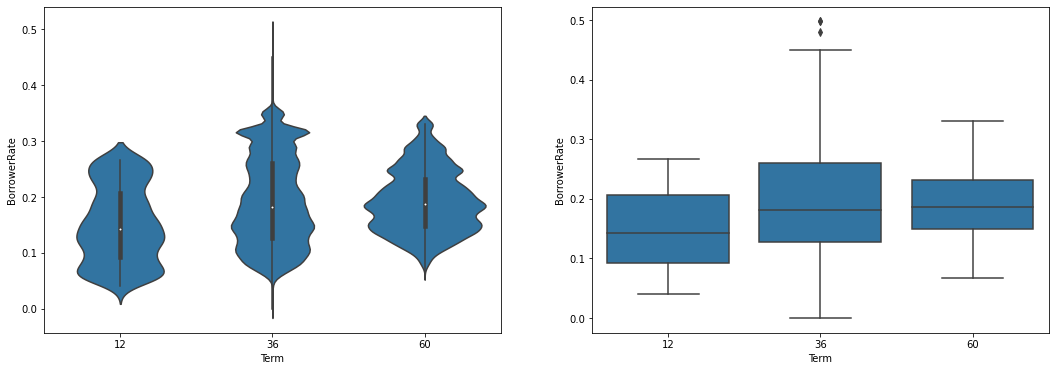

In [32]:
plt.figure(figsize=[18,6])

# violin plot on left
plt.subplot(1,2,1)
sb.violinplot(data=df, x='Term', y='BorrowerRate', color=sb.color_palette()[0]);

# box plot on right
plt.subplot(1,2,2)
sb.boxplot(data=df, x='Term', y='BorrowerRate', color=sb.color_palette()[0]);

The term 36 has a wider borrower rate range, but its median is nearly equal to the term 60. The term 12 has a lower median.

Next, Answer the question: What is the relation between the income range and the monthly loan payment? <br/>
A  violin plot and a box plot are used.

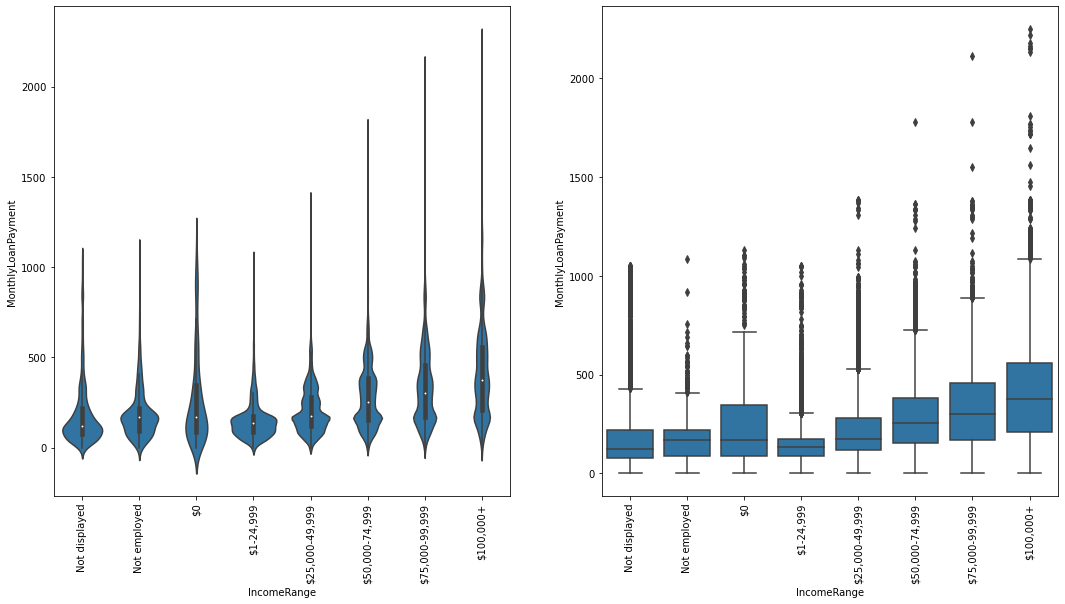

In [33]:
plt.figure(figsize=[18,9])

plt.subplot(1,2,1)
sb.violinplot(data=df, x='IncomeRange', y='MonthlyLoanPayment', color=sb.color_palette()[0])
plt.xticks(rotation=90);

plt.subplot(1,2,2)
sb.boxplot(data=df, x='IncomeRange', y='MonthlyLoanPayment', color=sb.color_palette()[0])
plt.xticks(rotation=90);

The not displayed, not employed and 0 income range have about the similar distribution and median. For other income ranges, the median monthly loan payment increases with increasing the range.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> -For the relation between borrower rate and loan original amount, the most frequent data are those around 0.3 borrower rate and 5000 Loan original amount. The correlation coefficient is -0.329 <br/>
> -For the relation between borrower rate and term, the term 36 has a wider borrower rate range, but its median is nearly equal to the term 60. The term 12 has a lower median.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> -For the relation between loan status and income range, data is highly concentrated in the current status and completed status with ranges higher than 0. The most frequent data is in the intersection between current status and 50000 - 74999 income range.

## Multivariate Exploration

Answer the question: What is the relation between the loan original amount, stated monthly income and borrower rate? <br/>
A scatter plot and a heat map are used.

In [47]:
# Make a new dataframe with monthly income fewer than 15000 in order to remove outliers
new_df = df[df['StatedMonthlyIncome']<15000]

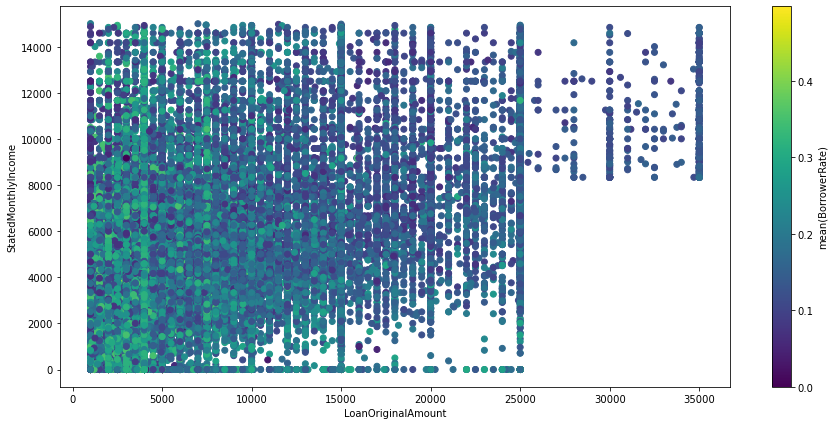

In [46]:
# display a scatter plot
plt.figure(figsize=[15,7])
plt.scatter(data = new_df, x = 'LoanOriginalAmount', y = 'StatedMonthlyIncome', c = 'BorrowerRate')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('StatedMonthlyIncome');
plt.colorbar(label = 'mean(BorrowerRate)');

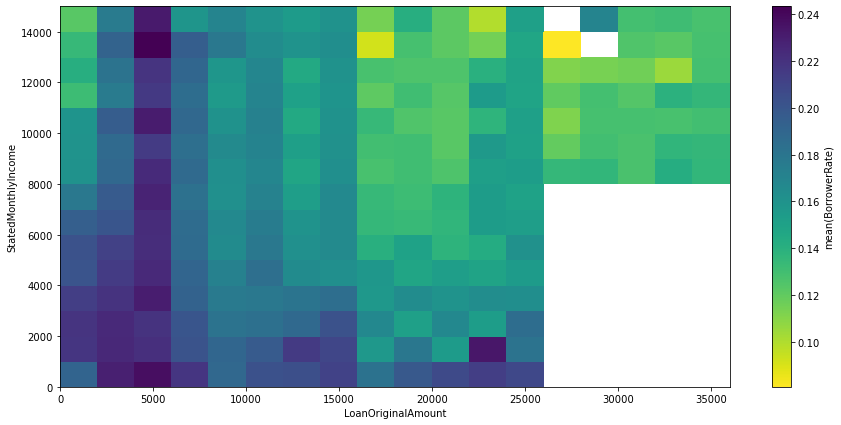

In [45]:
# Display a heat map
plt.figure(figsize=[15,7])

xbin_edges = np.arange(0, new_df['LoanOriginalAmount'].max()+2000, 2000)
ybin_edges = np.arange(0, new_df['StatedMonthlyIncome'].max()+1000, 1000)

# count number of points in each bin
xbin_idxs = pd.cut(new_df['LoanOriginalAmount'], xbin_edges, right = False,
                    include_lowest = True, labels = False).astype(int)
ybin_idxs = pd.cut(new_df['StatedMonthlyIncome'], ybin_edges, right = False,
                    include_lowest = True, labels = False).astype(int)

pts_per_bin = df.groupby([xbin_idxs, ybin_idxs]).size()
pts_per_bin = pts_per_bin.reset_index()
pts_per_bin = pts_per_bin.pivot(index = 'LoanOriginalAmount', columns = 'StatedMonthlyIncome').values

z_wts = new_df['BorrowerRate'] / pts_per_bin[xbin_idxs, ybin_idxs]

# plot the data using the calculated weights
plt.hist2d(data = new_df, x = 'LoanOriginalAmount', y = 'StatedMonthlyIncome', weights = z_wts,
           bins = [xbin_edges, ybin_edges], cmap = 'viridis_r', cmin=0.001);
plt.xlabel('LoanOriginalAmount')
plt.ylabel('StatedMonthlyIncome');
plt.colorbar(label = 'mean(BorrowerRate)');

The higher borrower rate means are found if the loan original amount is about 5000 or the stated monthly income is 2000 or fewer.

Next, Answer the question: What is the relation between the borrower rate, monthly loan payment, and Term? <br/>
A scatter plot is used in the first cell, then, the faceting method is applied to it in the next cell.

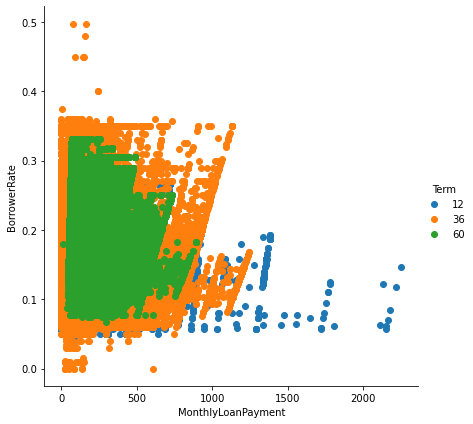

In [37]:
# Display a scatter plot
g = sb.FacetGrid(data = df, hue = 'Term', height=6)
g.map(plt.scatter, 'MonthlyLoanPayment', 'BorrowerRate')
g.add_legend();

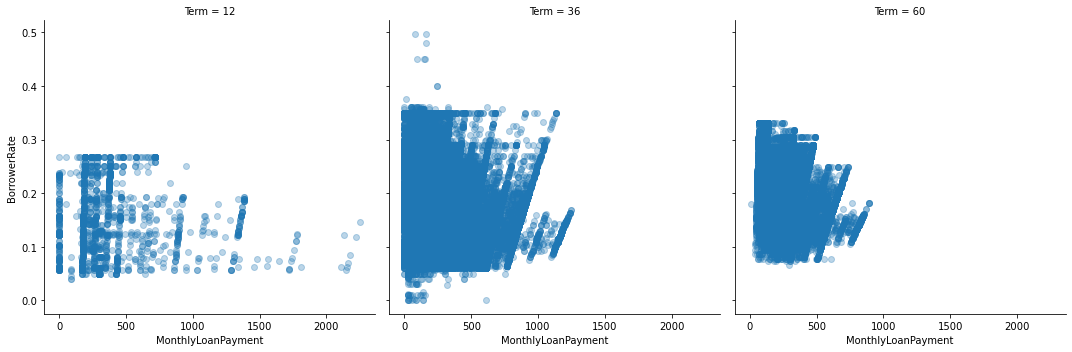

In [38]:
# Faceting the previous scatter plot
g = sb.FacetGrid(data = df, col = 'Term', height=5);
g.map(plt.scatter, 'MonthlyLoanPayment', 'BorrowerRate',alpha=.3);

For the term 12, the borrower rates are fewer than 0.3 with the higher monthly loan payment being about 2500.<br/>
For the term 36, the borrower rates are fewer than 0.5 with the higher monthly loan payment being fewer than 1500.<br/>
For the term 60, the borrower rates are fewer than 0.35 with the higher monthly loan payment being about 1000

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The higher borrower rate means are found if the loan original amount is about 5000 or the stated monthly income is 2000 or fewer.

### Were there any interesting or surprising interactions between features?

> For the term 12, the borrower rates are fewer than 0.3 with the higher monthly loan payment being about 2500.<br/>
For the term 36, the borrower rates are fewer than 0.5 with the higher monthly loan payment being fewer than 1500.<br/>
For the term 60, the borrower rates are fewer than 0.35 with the higher monthly loan payment being about 1000